In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, kpss

# 데이터 불러오기
df = pd.read_csv('DeepSeek_data.csv', parse_dates=['Date'], index_col='Date')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2191 entries, 2019-01-01 to 2024-12-30
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   btc_open_BTC-USD      2191 non-null   float64
 1   btc_high_BTC-USD      2191 non-null   float64
 2   btc_low_BTC-USD       2191 non-null   float64
 3   btc_close_BTC-USD     2191 non-null   float64
 4   btc_volume_BTC-USD    2191 non-null   float64
 5   sp500_close_^GSPC     2191 non-null   float64
 6   google_trend          2191 non-null   float64
 7   btc_hashrate          2191 non-null   float64
 8   btc_exchange_netflow  2191 non-null   float64
 9   ma7                   2191 non-null   float64
 10  ma21                  2191 non-null   float64
 11  rsi_14                2191 non-null   float64
 12  sp500_ret             2191 non-null   float64
 13  hash_rate_chg         2191 non-null   float64
 14  exchange_netflow_chg  2191 non-null   float64
dtypes: 

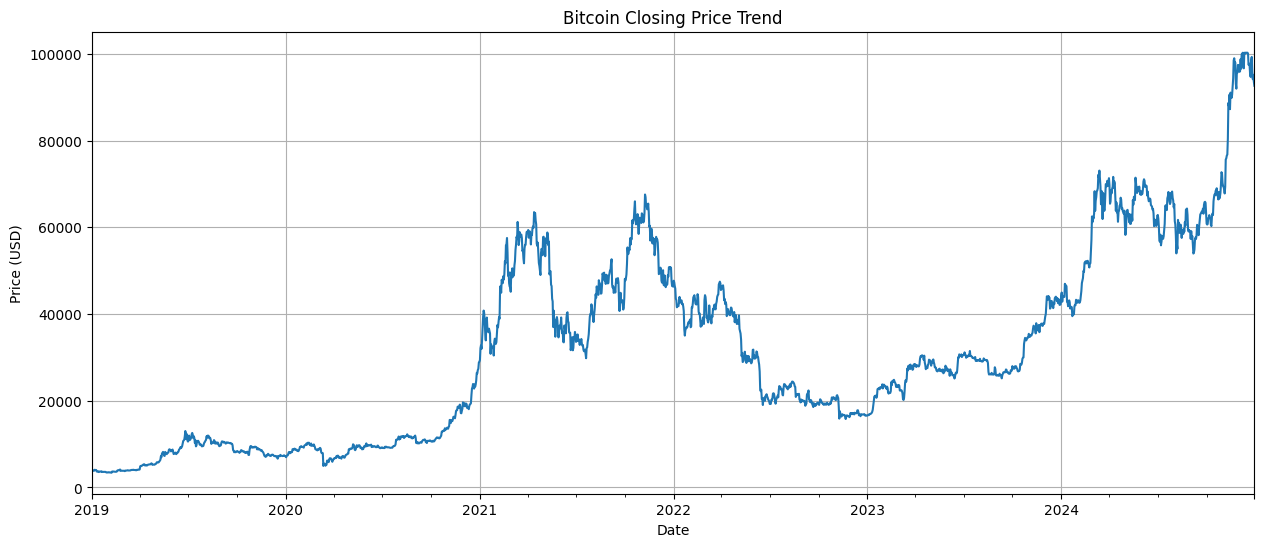

In [3]:
# 종가(btc_close) 시계열 플롯 분석
plt.figure(figsize=(15,6))
df['btc_close_BTC-USD'].plot(title='Bitcoin Closing Price Trend')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

# 비트코인 가격 흐름 요약 (2019~2024)

## 🔹 2019~2020: 저평가 & 반감기 전 준비 구간
- **가격대**: $3,000 ~ $12,000
- **특징**: 안정적인 상승세, 큰 이벤트 없음
- **분위기**: 장기 투자자 중심의 매집 시기

---

## 🔹 2021: 첫 불장 (Bull Market)
- **최고가 돌파**: $60,000 이상
- **주요 원인**:
  - Tesla 등 기관 투자자 진입
  - 코로나 유동성 확대
- **분위기**: 투자자 관심 폭발, 과열 양상

---

## 🔹 2022: 대폭락기
- **급락 원인**:
  - 루나·FTX 사태 등 암호화폐 신뢰 붕괴
  - 미국 금리 인상 등 거시경제 악화
- **분위기**: 극단적인 공포, 대규모 자금 이탈

---

## 🔹 2023: 회복기
- **가격대**: $20,000 ~ $30,000
- **분위기**:
  - ETF 루머 및 반감기 기대
  - 서서히 회복, 투자심리 회복 국면

---

## 🔹 2024: 2차 불장 & 사상 최고치 돌파
- **최고가 돌파**: $100,000
- **원인**:
  - 비트코인 반감기 (2024년 4월)
  - 실제 ETF 승인, 제도권 편입
- **분위기**: 강한 상승세, 투자 과열 징후

---

## 종합 요약
- **최고가 시점**: 2024년 말 (~$100,000)
- **급등 시기**: 2021년 초 / 2024년
- **급락 시기**: 2022년 (루나, FTX 사태)
- **회복 전환점**: 2023년 중반 이후



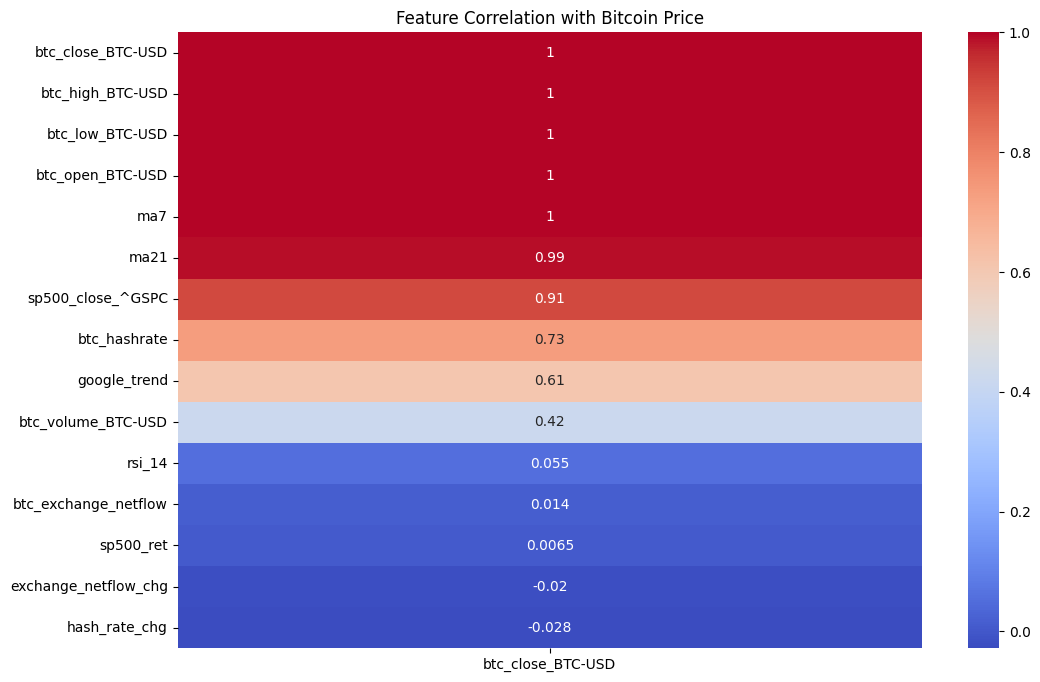

In [4]:
# 비트코인 종가 : 상관관계 히트맵
plt.figure(figsize=(12,8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix[['btc_close_BTC-USD']].sort_values(by='btc_close_BTC-USD', ascending=False),
            annot=True, cmap='coolwarm')
plt.title('Feature Correlation with Bitcoin Price')
plt.show()

# 📈 비트코인 가격과 각 변수 간 상관관계 분석

> 기준 변수: `btc_close_BTC-USD` (비트코인 종가)

---

##  상관관계가 높은 변수들 (양의 상관관계 ↑)
| 변수명 | 설명 | 상관계수 |
|--------|------|-----------|
| `btc_high_BTC-USD` | 고가 | **1.00** |
| `btc_low_BTC-USD` | 저가 | **1.00** |
| `btc_open_BTC-USD` | 시가 | **1.00** |
| `ma7` | 7일 이동평균 | **1.00** |
| `ma21` | 21일 이동평균 | **0.99** |
| `sp500_close_^GSPC` | S&P 500 지수 종가 | **0.91** |
| `btc_hashrate` | 비트코인 해시레이트 | **0.73** |
| `google_trend` | 구글 트렌드 검색량 | **0.61** |

 **해석**: 비트코인 가격은 **기술적 지표(ma7, ma21)** 및 **전통 금융시장(S&P500)**, **채굴 난이도(hashrate)**, **사람들의 관심도(google_trend)** 와 높은 양의 상관관계를 보임
          
ma7, ma21, btc_open, btc_high, btc_low 등은 다 같은 종가 기반으로 만들어진 파생 변수들이라,

서로 중복 정보를 많이 담고 있어서 상관관계가 거의 1에 가까움.

---

##  상관관계가 낮거나 미미한 변수들
| 변수명 | 설명 | 상관계수 |
|--------|------|-----------|
| `btc_volume_BTC-USD` | 거래량 | 0.42 |
| `rsi_14` | RSI (상대강도지수) | 0.055 |
| `btc_exchange_netflow` | 거래소로 입금된 순유입량 | 0.014 |
| `sp500_ret` | S&P500 수익률 | 0.0065 |
| `exchange_netflow_chg` | 거래소 순유입 변화율 | -0.02 |
| `hash_rate_chg` | 해시레이트 변화율 | -0.028 |

⚠️ **해석**:
- **RSI**, **순유입량**, **수익률 변화율** 등은 가격과 **거의 무관**한 것으로 나타남.
- **거래량**은 어느 정도 유의미하지만 **상대적으로 낮은 상관도**를 보임.


In [5]:
# ADF 테스트
result = adfuller(df['btc_close_BTC-USD'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# KPSS 테스트
result = kpss(df['btc_close_BTC-USD'])
print(f'\nKPSS Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -0.5014687313716243
p-value: 0.8917295646573726

KPSS Statistic: 3.992116157067184
p-value: 0.01


<ipython-input-5-8aaa4335b351>:7: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(df['btc_close_BTC-USD'])


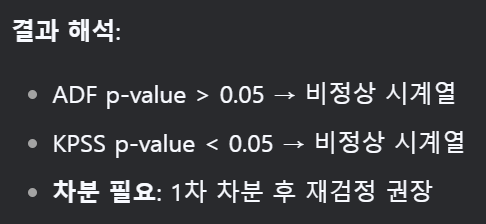

In [6]:
# 1차 차분 적용 후 정상성 재검증
df['btc_close_diff'] = df['btc_close_BTC-USD'].diff().dropna()

# ADF
adf_result = adfuller(df['btc_close_diff'].dropna())
print(f'ADF after diff: {adf_result[0]}, p-value: {adf_result[1]}')

# KPSS
kpss_result = kpss(df['btc_close_diff'].dropna())
print(f'KPSS after diff: {kpss_result[0]}, p-value: {kpss_result[1]}')


ADF after diff: -7.693561550595115, p-value: 1.3984615300281206e-11
KPSS after diff: 0.1905689523585446, p-value: 0.1


<ipython-input-6-2aa7b080c8c8>:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(df['btc_close_diff'].dropna())


1차 차분 후, 두 검정 모두 정상성을 만족

따라서 이 시계열은 1차 차분을 통해 정상 시계열이 되었으며, 예측 모델(ARIMA 등)에 사용 가능

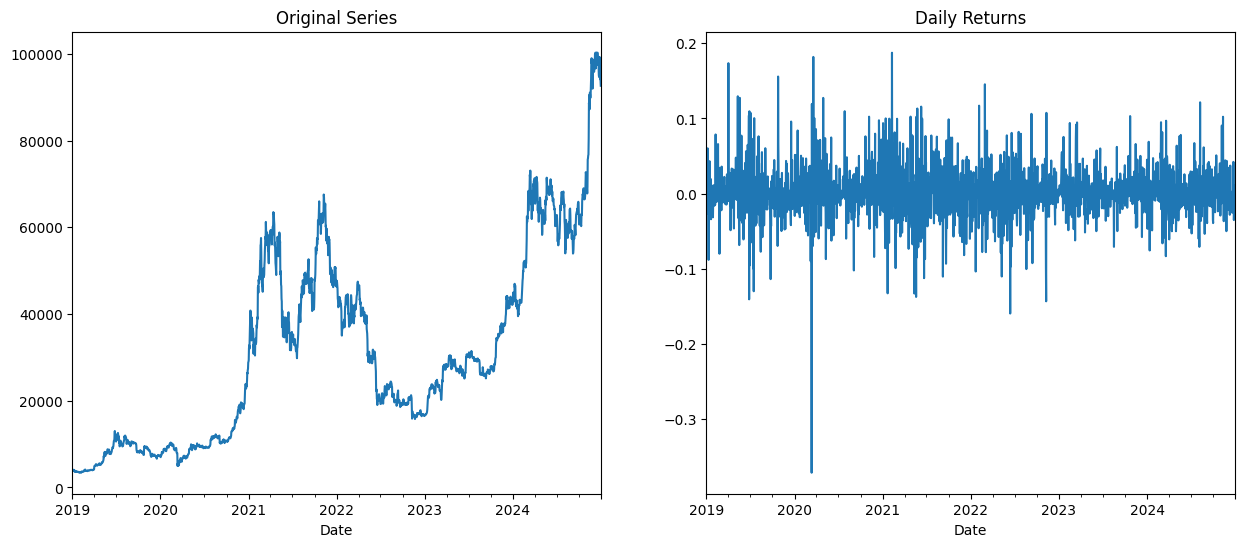

In [7]:
# 분산성 분석 (시계열)
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
df['btc_close_BTC-USD'].plot(title='Original Series')
plt.subplot(1,2,2)
df['btc_close_BTC-USD'].pct_change().plot(title='Daily Returns')
plt.show()

#  비트코인 종가 시계열 분석

## 시각화 분석 요약

### 📈 왼쪽: 원본 시계열 (`btc_close_BTC-USD`)
- 명확한 **추세(trend)** 존재
- 시간이 지날수록 **변동성 증가** (특히 2021~2024년 구간)
- 시계열이 **비정상(non-stationary)**이고 **이분산적(heteroscedastic)**임
- ADF/KPSS 검정 결과와도 일치:
  - **ADF**: p-value ≫ 0.05 → 단위근 존재
  - **KPSS**: p-value ≪ 0.05 → 정상성 없음

---

### 📉 오른쪽: 비율 변화율 (`Daily Returns`, `pct_change()`)
- **수익률 기반 시계열**로, 변동성이 다소 안정됨
- 일부 **이상치(spikes)** 존재 (특히 2020년경)
- 완전한 분산 안정성은 아니지만, 원본보다 훨씬 나음

---

## 모델링 전략

| 모델 | 추천 여부 | 이유 |
|------|-----------|------|
| **ARIMA / SARIMA** | ❌ | 정상성/분산 안정성 둘 다 부족 |
| **ARIMA + GARCH** | ✅ | 평균과 분산을 분리해 모델링 가능 |
| **LSTM / 딥러닝** | ✅ | 분산 안정성 필요 없음, 복잡한 패턴 학습에 적합 |
| **XGBoost / Random Forest** | ✅ | 특징 변수 기반 학습, 수익률 사용 가능 |

---

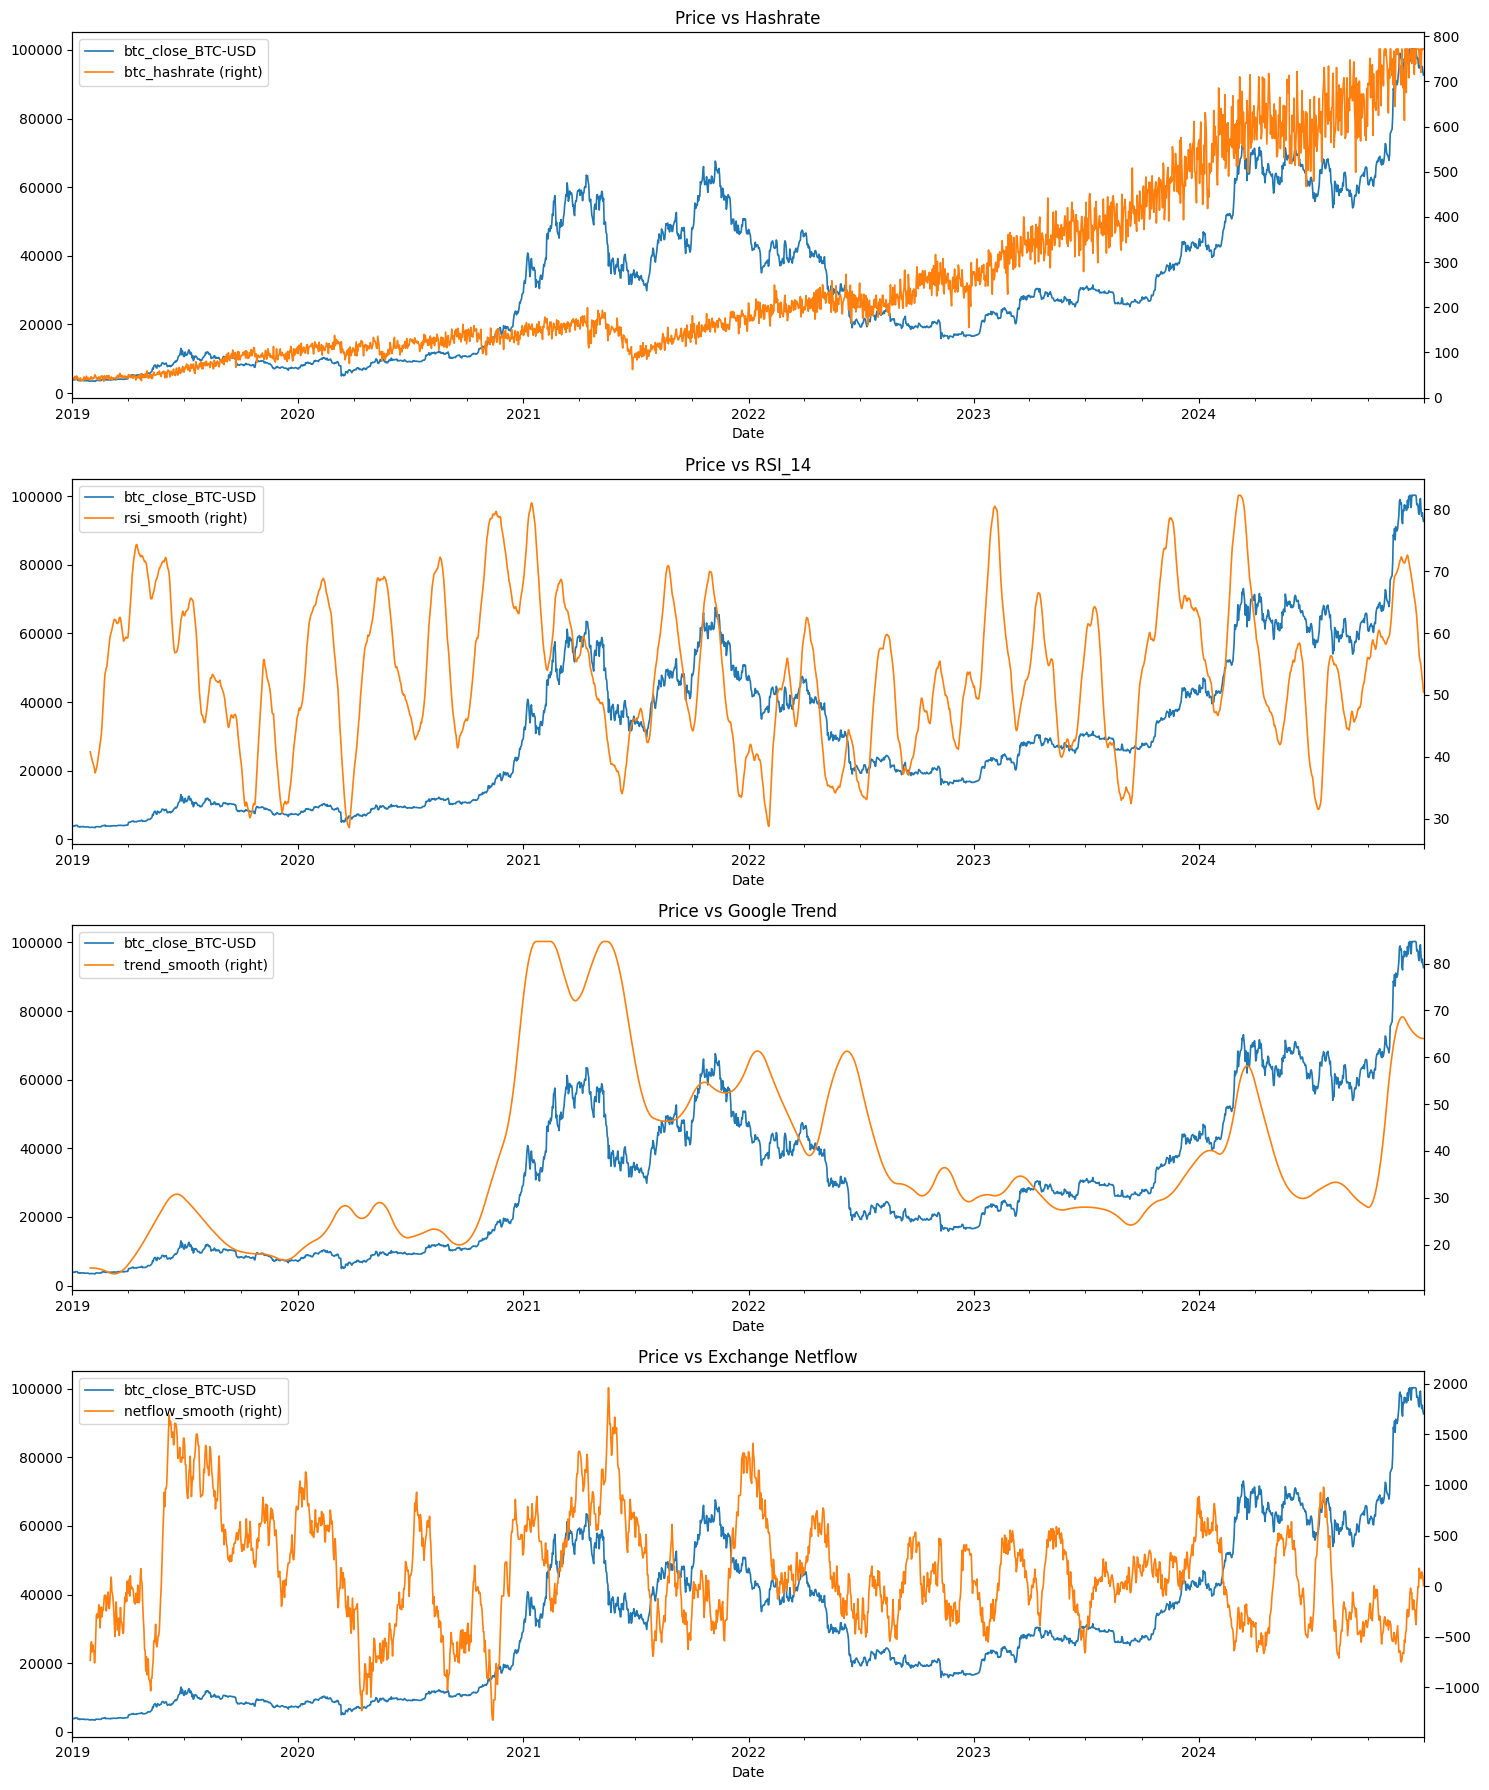

In [26]:
# 주요 변수와의 관계 시각화

# RSI & Trend smoothing
df['rsi_smooth'] = df['rsi_14'].rolling(window=30).mean()
df['trend_smooth'] = df['google_trend'].rolling(window=30).mean()

# Netflow smoothing + clipping
df['netflow_smooth'] = df['btc_exchange_netflow'].clip(-3000, 3000).rolling(window=30).mean()

fig, axes = plt.subplots(4, 1, figsize=(15, 18))

# 1. Hashrate (채굴 난이도 관련)
df[['btc_close_BTC-USD', 'btc_hashrate']].plot(
    ax=axes[0], secondary_y='btc_hashrate', title='Price vs Hashrate', linewidth=1.2
)

# 2. RSI (과매수/과매도 판단 지표)
df[['btc_close_BTC-USD', 'rsi_smooth']].plot(
    ax=axes[1], secondary_y='rsi_smooth', title='Price vs RSI_14', linewidth=1.2
)

# 3. Google Trend (관심도/심리 분석)
df[['btc_close_BTC-USD', 'trend_smooth']].plot(
    ax=axes[2], secondary_y='trend_smooth', title='Price vs Google Trend', linewidth=1.2
)

# 4.  Exchange Netflow (순유출/순유입양)
df[['btc_close_BTC-USD', 'netflow_smooth']].plot(
    ax=axes[3], secondary_y='netflow_smooth', title='Price vs Exchange Netflow', linewidth=1.2
)

plt.tight_layout()
plt.show()


# 📈 BTC 가격 관련 변수 분석 요약

## 1. Hashrate
- **관찰**: Hashrate는 전반적으로 **지속적인 상승** 추세.
- **관계**: BTC 가격과 **장기적으로 양의 상관관계** 존재.
- **해석**:
  - Hashrate 상승 → 채굴자 증가 → 네트워크 안정성 강화.
  - 이는 투자자 신뢰를 유발하여 **BTC 가격 상승 요인**이 될 수 있음.
  - 단기적 가격 반응은 크지 않으나 **장기 추세 예측에 유효**.

---

## 2.RSI (14일 기준)
- **관찰**: RSI가 70 이상일 때 **과매수**, 30 이하일 때 **과매도** 상태.
- **관계**: **단기적인 가격 조정 신호**로 활용 가능.
- **해석**:
  - RSI가 급등하면 이후 조정 발생 가능성.
  - RSI가 급락하면 반등 가능성.
  - **단기 매매 판단 지표**로 유용.

---

## 3.Google Trend
- **관찰**: BTC 가격 급등 시 **관심도 급상승**, 하락 시 관심도 감소.
- **관계**: 대중 심리 및 투자자 관심도와 밀접한 상관관계.
- **해석**:
  - 관심도 급증 = **FOMO, 투기 과열 신호** 가능.
  - 관심도 피크가 BTC 고점과 유사하게 나타남.
  - **시장 과열 경고 지표**로 활용 가능.

---

## 4.Exchange Netflow
- **관찰**:
  - Netflow > 0: 거래소 유입 → 매도 압력 가능성 증가.
  - Netflow < 0: 거래소 유출 → 장기 보유 가능성 → 상승 요인.
- **관계**: 가격과 **반대 방향 선행 신호**로 작용하는 경우 다수.
- **해석**:
  - **고래 움직임** 파악에 효과적.
  - **중장기 추세 전환 포착**에 유리.
  - 원본 데이터는 노이즈가 많아 smoothing 필수.

---

##  종합 정리

| 변수                | 가격과의 관계               | 시사점 |
|---------------------|-----------------------------|--------|
| **Hashrate**        | 장기 양의 상관관계           | 네트워크 건강성 반영 |
| **RSI (14일)**      | 단기 반전 신호               | 과매수/과매도 기준 매매 시점 포착 |
| **Google Trend**    | 시장 심리 반영               | 관심 급등 시 고점 가능성 |
| **Exchange Netflow**| 선행적 반전 지표 가능성       | 고래/기관 매매 흐름 파악 |

